In [29]:
#importing libraries
import numpy as np
import pandas as pd
from libpysal import weights
from libpysal.weights import Queen, lag_spatial
from esda.moran import Moran
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [30]:
# Load your geospatial dataset into a Pandas DataFrame
df = pd.read_pickle('../data/manipulated/data_final.pkl')
for col in df.columns:
    print(col)

obj_type
name
info
damage_gra
notation
or_src_id
cd_value
geometry
Province
city
population
income
total_sales
second_sales
water_access
elec_cons
building_perm
land_permited
labour_fource
unemployment
agricultural
life_time
hb_per100000
fertility
hh_size
centroid
latitude
longitude
nearest_fault_distance_km
nearest_eq_distance_km
İlçeler
Kayıtlı Nüfus
Longitude
Latitude
Municipio
eclass_public
eclass_private
eclass_total
enumber_public
enumber_private
enumber_total
e_male_public
e_female_public
e_total_public
e_male_private
e_female_private
e_total_private
e_total
et_male_public
et_female_public
et_total_public
et_male_private
et_female_private
et_total_private
et_total
hclass_public
hclass_private
hclass_total
hnumber_public
hnumber_private
hnumber_total
h_male_public
h_female_public
h_total_public
h_male_private
h_female_private
h_total_private
h_total
Okul Türü_x
hs_religious_male_public
hs_religious_female_public
hs_religious_total_public
hs_religious_male_private
hs_religious_fem

In [31]:


mapping = {
    "Damaged": 3,
    "Destroyed": 4,
    "No visible damage": 1,
    "Possibly damaged": 2
}

df['damage_gra'] = df['damage_gra'].replace(mapping)

In [32]:
#df.drop(['geometry'], axis=1, inplace=True)
#df = df.set_geometry("centroid")
#df['centroid'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
df

,obj_type,name,info,damage_gra,notation,or_src_id,cd_value,geometry,Province,city,...,p_total_private,p_total,pt_male_public,pt_female_public,pt_total_public,pt_male_private,pt_female_private,pt_total_private,pt_total,Geometry
0,11-Residential Buildings,Unknown,997-Not Applicable,1,Building block,1,Not Applicable,"POLYGON ((38.31461 37.76919, 38.31480 37.76871...",ADIYAMAN,ADIYAMAN,...,1349.0,18086.0,121.0,647.0,768.0,7.0,131.0,138.0,906.0,POINT (37 37.6932)
1,11-Residential Buildings,Unknown,997-Not Applicable,1,Building block,1,Not Applicable,"POLYGON ((38.31461 37.76919, 38.31480 37.76871...",ADIYAMAN,ADIYAMAN,...,1349.0,18086.0,121.0,647.0,768.0,7.0,131.0,138.0,906.0,POINT (38 38.0325)
2,11-Residential Buildings,Unknown,997-Not Applicable,1,Building block,1,Not Applicable,"POLYGON ((38.31461 37.76919, 38.31480 37.76871...",ADIYAMAN,ADIYAMAN,...,1349.0,18086.0,121.0,647.0,768.0,7.0,131.0,138.0,906.0,POINT (39 38.0289)
3,11-Residential Buildings,Unknown,997-Not Applicable,1,Building block,1,Not Applicable,"POLYGON ((38.31461 37.76919, 38.31480 37.76871...",ADIYAMAN,ADIYAMAN,...,1349.0,18086.0,121.0,647.0,768.0,7.0,131.0,138.0,906.0,POINT (37 37.7839)
4,11-Residential Buildings,Unknown,997-Not Applicable,1,Building block,1,Not Applicable,"POLYGON ((38.31461 37.76919, 38.31480 37.76871...",ADIYAMAN,ADIYAMAN,...,1349.0,18086.0,121.0,647.0,768.0,7.0,131.0,138.0,906.0,POINT (38 37.7904)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322419,12-Non-residential Buildings,Unknown,1251-Industrial buildings,3,Building block,1,Not Applicable,"POLYGON ((36.86534 37.38198, 36.86536 37.38205...",KAHRAMANMARAŞ,TÜRKOĞLU,...,2121.0,29716.0,158.0,1031.0,1189.0,7.0,135.0,142.0,1331.0,POINT (36.4949 38.0204)
322420,12-Non-residential Buildings,Unknown,1251-Industrial buildings,3,Building block,1,Not Applicable,"POLYGON ((36.86534 37.38198, 36.86536 37.38205...",KAHRAMANMARAŞ,TÜRKOĞLU,...,2121.0,29716.0,158.0,1031.0,1189.0,7.0,135.0,142.0,1331.0,POINT (37.4474 37.9656)
322421,12-Non-residential Buildings,Unknown,1251-Industrial buildings,3,Building block,1,Not Applicable,"POLYGON ((36.86534 37.38198, 36.86536 37.38205...",KAHRAMANMARAŞ,TÜRKOĞLU,...,2121.0,29716.0,158.0,1031.0,1189.0,7.0,135.0,142.0,1331.0,POINT (36.8397 37.6003)
322422,12-Non-residential Buildings,Unknown,1251-Industrial buildings,3,Building block,1,Not Applicable,"POLYGON ((36.86534 37.38198, 36.86536 37.38205...",KAHRAMANMARAŞ,TÜRKOĞLU,...,2121.0,29716.0,158.0,1031.0,1189.0,7.0,135.0,142.0,1331.0,POINT (37.2936 37.4895)


/tmp/ipykernel_19742/674562423.py:2: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


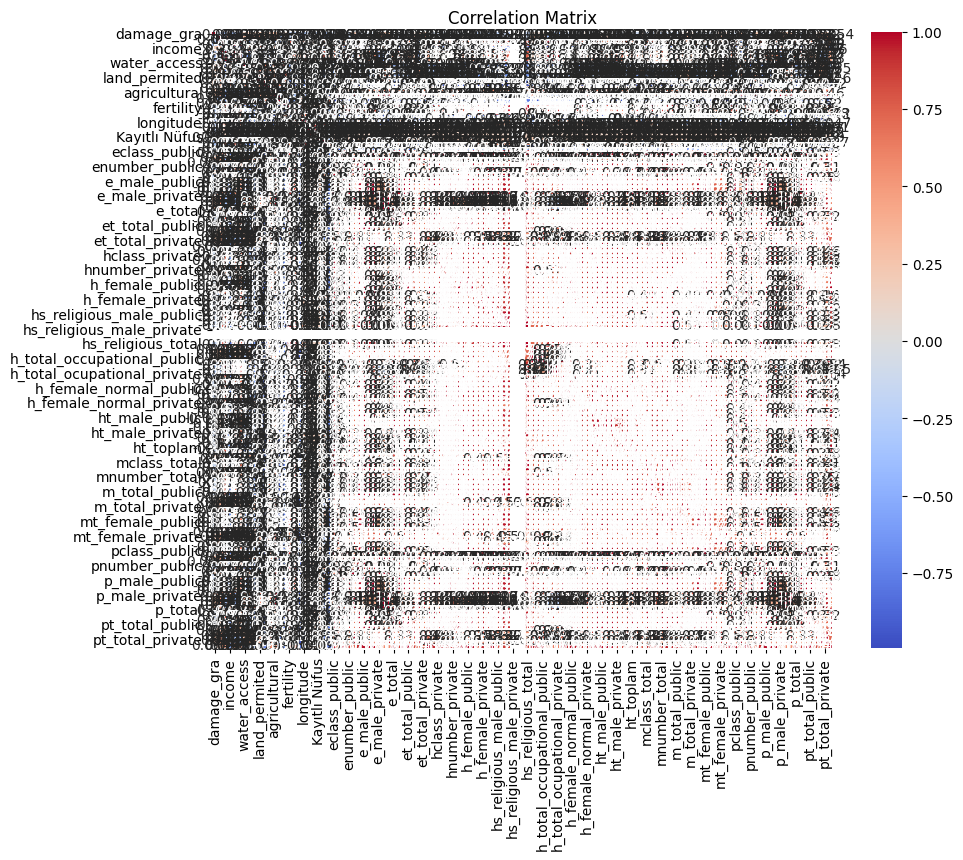

In [34]:


# Calculate correlation matrix
correlation_matrix = df.corr()

# Identify features with high correlation to the target variable
target_correlation = correlation_matrix['damage_gra'].abs().sort_values(ascending=False)
highly_correlated_features = target_correlation[target_correlation > 0.5].index.tolist()



# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title and display the plot
plt.title('Correlation Matrix')
plt.show()


In [35]:
from sklearn.neighbors import BallTree
import numpy as np

# Convert 'longitude' and 'latitude' to a numpy array of shape (n, 2)
points = np.array(list(zip(df['longitude'], df['latitude'])))

# Create a BallTree
tree = BallTree(points)

# Query the BallTree for the 5 nearest neighbors
dist, idx = tree.query(points, k=20) # Change `k` accordingly

# Create a dictionary where the keys are index values and the values are lists of the indices of the k nearest neighbors
neighbors = {i: idx[i].tolist() for i in range(points.shape[0])}

# Create KNN spatial weights from the neighbors dictionary
w = weights.W(neighbors)

# Now you can calculate Moran's I
moran_i = Moran(df['damage_gra'], w)
print("Moran's I:", moran_i.I)

/home/lapita/anaconda3/envs/tfm/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5991 disconnected components.
  warnings.warn(message)


Moran's I: 0.9049914235506099


In [36]:
# Compute the spatial lag of a target variable
df['lag_damage_gra'] = lag_spatial(w, df['damage_gra'])



In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Create spatial lag variable(s)
# ...

# Step 2: Prepare the data
X = df.drop(columns=['damage_gra'])
y = df['damage_gra']
# ...

# Step 3: Perform LASSO regression and feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

X

In [42]:
#defining categorical and numerical features
categorical_features = ['obj_type','info', 'notation','or_src_id', 'Province','Municipio',]
numeric_features = ['population','income','total_sales', 'second_sales', 'water_access', 'elec_cons', 'building_perm',
           'land_permited', 'labour_fource','unemployment','agricultural', 'life_time', 'hb_per100000', 'fertility',
           'hh_size','latitude','longitude', 'nearest_fault_distance_km','nearest_eq_distance_km',
           'Longitude','Latitude', 'eclass_public','eclass_private','eclass_total','enumber_public','enumber_private',
           'enumber_total', 'e_male_public', 'e_female_public', 'e_total_public', 'e_male_private', 'e_female_private',
           'e_total_private','e_total','et_male_public','et_female_public', 'et_total_public','et_male_private', 
           'et_total_private', 'et_total', 'hclass_public','hclass_private','hclass_total','hnumber_public',
           'hnumber_private', 'hnumber_total','h_male_public','h_female_public','h_total_public','h_male_private',
           'h_female_private','h_total_private','h_total','hs_religious_male_public','hs_religious_female_public',
           'hs_religious_total_public', 'hs_religious_male_private', 'hs_religious_female_private', 'hs_religious_total_private',
           'hs_religious_total','h_male_occupational_public','h_female_occupational_public','h_total_occupational_public',
           'h_total_ocupational_private','h_occupational_total',
           'h_male_normal_public','h_female_normal_public','h_total_normal_public','h_male_normal_private','h_female_normal_private',
           'h_total_normal_private','h_normal_total','ht_male_public','ht_female_public','ht_total_public','ht_male_private',
           'ht_female_private','ht_total_private','ht_toplam','mclass_public','mclass_private','mclass_total','mnumber_public',
           'mnumber_private','mnumber_total','m_male_public','m_female_public','m_total_public','m_male_private','m_female_private',
           'm_total_private','m_total','mt_male_public','mt_female_public','mt_total_public','mt_male_private','mt_female_private',
           'mt_total_private','mt_total','pclass_public','pclass_private','pclass_toplam','pnumber_public','pnumber_private',
           'pnumber_total','p_male_public','p_female_public','p_total_public','p_male_private','p_female_private','p_total_private',
           "p_total",'pt_male_public','pt_female_public','pt_total_public','pt_male_private','pt_female_private','pt_total_private',
           'pt_total',
           ]

In [39]:
# Check for duplicate column names
duplicate_columns = X.columns[X.columns.duplicated()]
print("Duplicate Columns:", duplicate_columns)

X = X.drop(columns=duplicate_columns, axis=1)


Duplicate Columns: Index(['h_male_occupational_private'], dtype='object')


In [40]:
def make_columns_distinct(df):
    """A function that makes all column names distinct."""
    modified_columns = []
    seen_columns = set()

    for column in df.columns:
        modified_column = column
        counter = 1

        while modified_column in seen_columns:
            modified_column = f"{column}_{counter}"
            counter += 1

        modified_columns.append(modified_column)
        seen_columns.add(modified_column)

    df.columns = modified_columns
    return df


# Make the columns distinct
df= make_columns_distinct(df)

# Print the modified column names
for col in X.columns:
    print(col)
    

obj_type
name
info
notation
or_src_id
cd_value
geometry
Province
city
population
income
total_sales
second_sales
water_access
elec_cons
building_perm
land_permited
labour_fource
unemployment
agricultural
life_time
hb_per100000
fertility
hh_size
centroid
latitude
longitude
nearest_fault_distance_km
nearest_eq_distance_km
İlçeler
Kayıtlı Nüfus
Longitude
Latitude
Municipio
eclass_public
eclass_private
eclass_total
enumber_public
enumber_private
enumber_total
e_male_public
e_female_public
e_total_public
e_male_private
e_female_private
e_total_private
e_total
et_male_public
et_female_public
et_total_public
et_male_private
et_female_private
et_total_private
et_total
hclass_public
hclass_private
hclass_total
hnumber_public
hnumber_private
hnumber_total
h_male_public
h_female_public
h_total_public
h_male_private
h_female_private
h_total_private
h_total
Okul Türü_x
hs_religious_male_public
hs_religious_female_public
hs_religious_total_public
hs_religious_male_private
hs_religious_female_private

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

In [44]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.1)  # Adjust alpha value as needed
lasso.fit(X_train_scaled, y_train)

selected_features = X_train.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features)

ValueError: could not convert string to float: '11-Residential Buildings'